# Performing The Circuit Walks

In this document, we load the data with clusters found in the data preparation Jupyter Notebook. We also import the circuit walks found from the circuit walk program in our GitHub. The core of this notebook is devoted to performing the circuit walk and plotting the resulting cluster.

## Load Relevant Materials

In [35]:
# Load Packages
import numpy as np
import pandas as pd
import geopandas as gpd # For plotting shp files
import shapefile as shp # For plotting shp file
import matplotlib.pyplot as plt
import shapely.wkt # Converting csv to geopandas

In [40]:
# Load Data
data06 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Performing_Walk/cleanedData2006.csv")
data10 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Performing_Walk/cleanedData2010.csv")
data15 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Performing_Walk/cleanedData2015.csv")

walk0610 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2006_to_2010_circuitwalk_geo.csv", header = None)
walk1015 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2010_to_2015_circuitwalk_geo.csv", header = None)
walk0615 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2006_to_2015_circuitwalk_geo.csv", header = None)

clusters06 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2006_clsuters.csv", header = None)
clusters10 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2010_clusters.csv", header = None)
clusters15 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Python_Functions/2015_clusters.csv", header = None)

# Coerce to int
clusters06 = clusters06.astype(int)
clusters10 = clusters10.astype(int)
clusters15 = clusters15.astype(int)

# Update data with cluster assignments
data06["CLUSTER"] = clusters06 
data10["CLUSTER"] = clusters10 
data15["CLUSTER"] = clusters15 

# Convert to geopandas
geometry = data06["geometry"].map(shapely.wkt.loads)
data06 = gpd.GeoDataFrame(data06, geometry=geometry)
data10 = gpd.GeoDataFrame(data10, geometry=geometry)
data15 = gpd.GeoDataFrame(data15, geometry=geometry)

## Additional Helper Functions

In [30]:
def update_clusters(cluster, circuit):
    '''
    input: a set of cluster labels <list float> C where c_i in {1,..., k}.
    a circuit <list float> for the cluster polyhedron
    output: the updated set of clusters after walking in the direction of the circuit

    logic: cluster numbers are assigned for each nodes, so num_nodes is len(cluster)
    circuit length is num_clusters*num_nodes, so division return num_clusters
    Transform cluster assignment to binary matrix where [i,j] = 1 if elt i is assigned
    to cluster j and 0 otherwise. Then reshape so it may be broadcasted with the circuit
    Transform back to a list of cluster labels.
    '''

    num_nodes = len(cluster)
    cluster = np.array(cluster)
    num_clusters = len(circuit)//num_nodes

    binary_assignments = np.zeros((num_nodes, num_clusters))
    for i in range(num_nodes):
        binary_assignments[i, cluster[i]] = 1

    binary_assignments = np.reshape(binary_assignments, num_clusters*num_nodes)

    updated = list(binary_assignments + circuit)
    
    new_cluster_labels = []
    for i in range(num_nodes):
        new_cluster_labels += [updated[num_clusters*i:num_clusters*(i+1)].index(1)]
    #new_cluster_labels = [updated[num_clusters*i:num_clusters*(i+1)].index(1) 
    #    for i in range(num_nodes)]

    return new_cluster_labels 

def cluster_to_circuit(cluster, num_clusters):
    circuit = np.zeros(len(cluster)*num_clusters)

    for i in range(len(cluster)):
        circuit[(i*num_clusters)+cluster[i]] = 1

    return circuit

## Plots of Clusters

### 2006

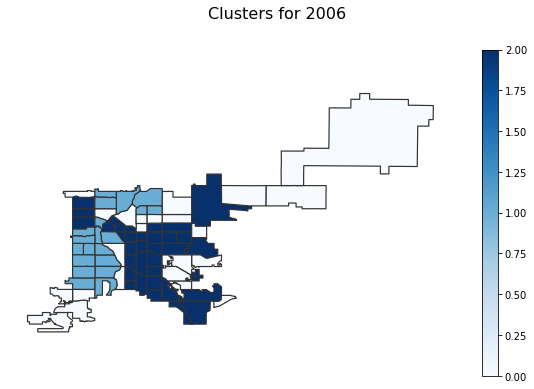

In [41]:
fig, ax = plt.subplots(1, figsize=(10,6))
data06.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2006', fontsize=16)

plt.savefig("06plot.png")

### 2010

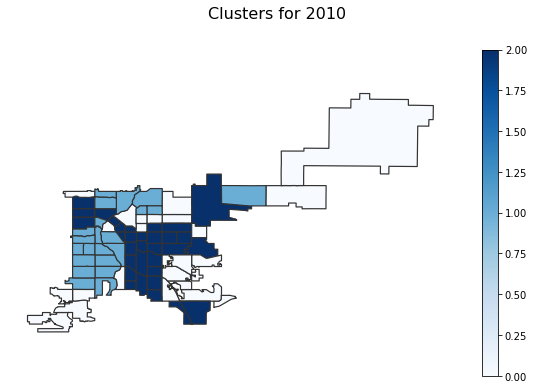

In [42]:
fig, ax = plt.subplots(1, figsize=(10,6))
data10.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2010', fontsize=16)

plt.savefig("10plot.png")

### 2015

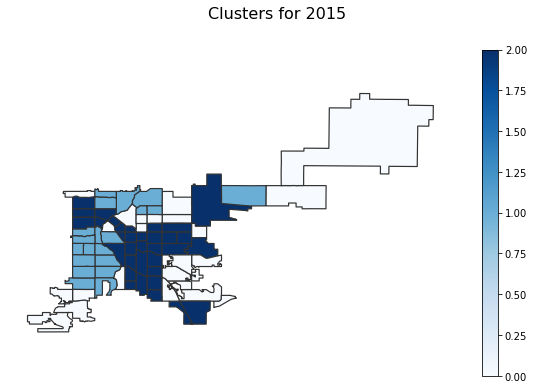

In [43]:
fig, ax = plt.subplots(1, figsize=(10,6))
data15.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2015', fontsize=16)

plt.savefig("15plot.png")

## Walk from 2006 to 2010

With the data loaded, we are ready to perform the circuit walk.

In [44]:
cluster_labels_0610 = []
cluster = np.array(data06[["CLUSTER"]]).transpose()[0]
cluster_end = np.array(data10[["CLUSTER"]]).transpose()[0]
walk0610_arr = np.array(walk0610)
(m0610,_) = walk0610_arr.shape

In [45]:
partial0610 = []
for i in range(m0610):
    step = walk0610_arr[i,:]
    updated_cluster = update_clusters(cluster, step)
    partial0610.append(updated_cluster)
    cluster = updated_cluster  

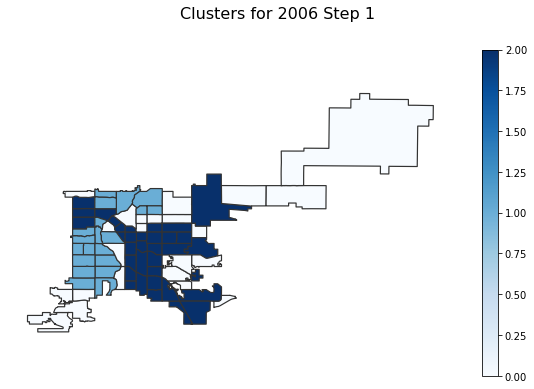

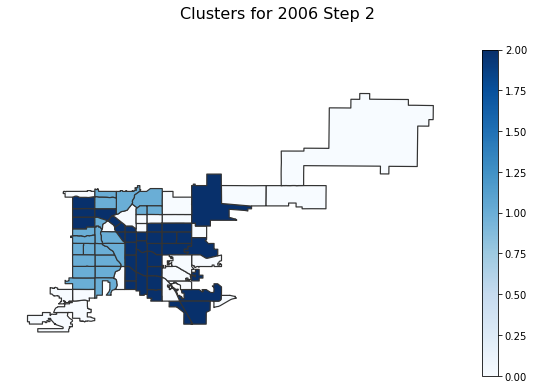

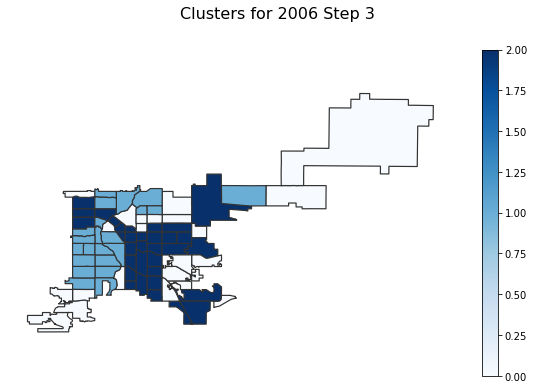

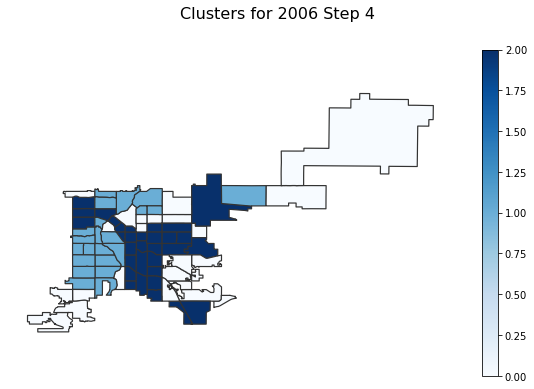

In [46]:
data = data06.copy()
i = 1
for cluster in partial0610:
    data["CLUSTER"] = cluster
    fig, ax = plt.subplots(1, figsize=(10,6))
    data.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
    ax.axis('off')
    fig.suptitle('Clusters for 2006 Step ' + str(i), fontsize=16)
    plt.savefig("0610step" + str(i) + "plot.png")
    i += 1

## Walk from 2006 to 2015

In [47]:
cluster_labels_0615 = []
cluster = np.array(data06[["CLUSTER"]]).transpose()[0]
cluster_end = np.array(data15[["CLUSTER"]]).transpose()[0]
walk0615_arr = np.array(walk0615)
(m0615,_) = walk0615_arr.shape

In [48]:
partial0615 = []
for i in range(m0615):
    step = walk0615_arr[i,:]
    updated_cluster = update_clusters(cluster, step)
    partial0615.append(updated_cluster)
    cluster = updated_cluster 

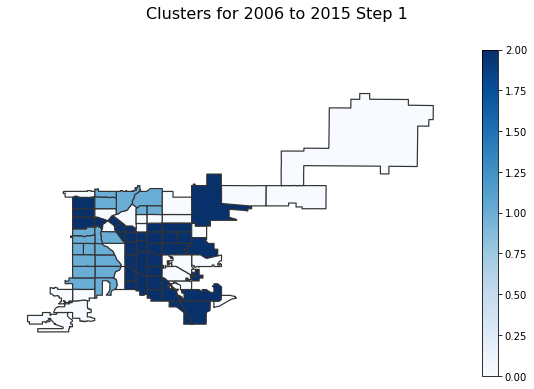

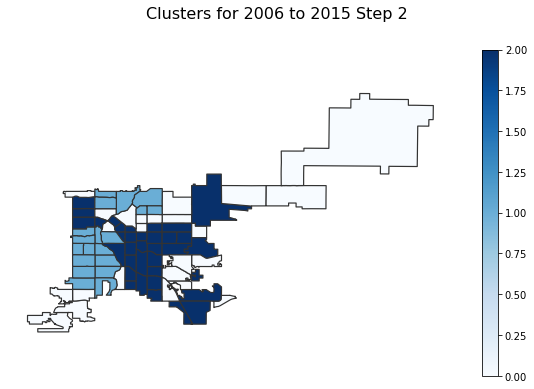

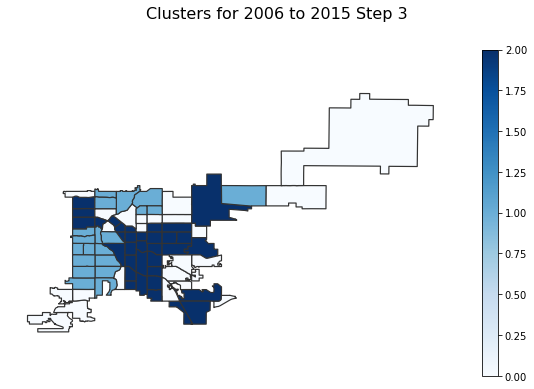

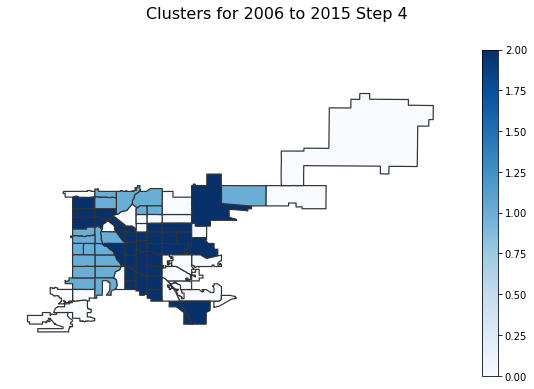

In [49]:
data = data06.copy()
i = 1
for cluster in partial0615:
    data["CLUSTER"] = cluster
    fig, ax = plt.subplots(1, figsize=(10,6))
    data.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
    ax.axis('off')
    fig.suptitle('Clusters for 2006 to 2015 Step ' + str(i), fontsize=16)
    plt.savefig("0615step" + str(i) + "plot.png")
    i += 1

## Walk from 2010 to 2015

In [50]:
cluster_labels_1015 = []
cluster = np.array(data10[["CLUSTER"]]).transpose()[0]
cluster_end = np.array(data15[["CLUSTER"]]).transpose()[0]
walk1015_arr = np.array(walk1015)
(m1015,_) = walk1015_arr.shape

In [51]:
partial1015 = []
for i in range(m1015):
    step = walk1015_arr[i,:]
    updated_cluster = update_clusters(cluster, step)
    partial1015.append(updated_cluster)
    cluster = updated_cluster  

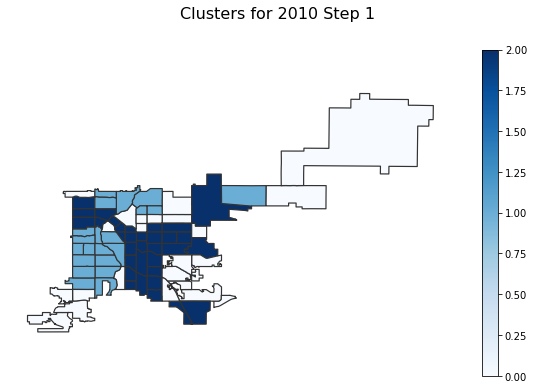

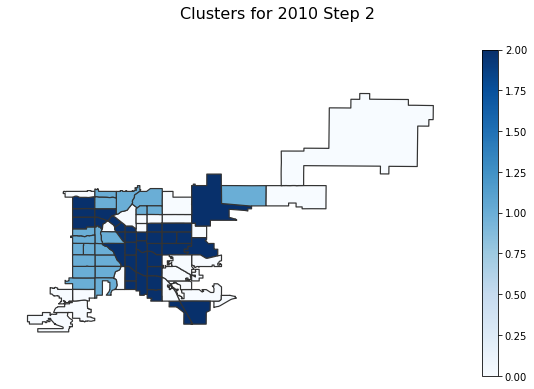

In [52]:
data = data10.copy()
i = 1
for cluster in partial1015:
    data["CLUSTER"] = cluster
    fig, ax = plt.subplots(1, figsize=(10,6))
    data.plot(column='CLUSTER', cmap='Blues', linewidth=1.2, ax=ax, edgecolor='0.2', legend = True)
    ax.axis('off')
    fig.suptitle('Clusters for 2010 Step ' + str(i), fontsize=16)
    plt.savefig("1015step" + str(i) + "plot.png")
    i += 1